#**CycleGAN Style Transfer**

*by Vizgalov Anton*

##**Prerequisites**

In [0]:
!git clone https://github.com/AnthonyQuantum/CycleGAN-Style-transfer.git

In [0]:
import os
os.chdir('CycleGAN-Style-transfer/')

In [0]:
!pip install -r requirements.txt

##**Datasets**

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder.

In [0]:
!unzip -q earth2mars_v1.zip

##**Training**


In [0]:
!python train.py --dataroot ./datasets/earth2mars_v1 --name earth2mars_v1 --model cycle_gan --checkpoints_dir checkpoints --n_epochs 8

##**Datasets**

In [0]:
!python test.py --dataroot datasets/earth2mars_v1 --name earth2mars_v1 --model cycle_gan --no_dropout

# Visualize

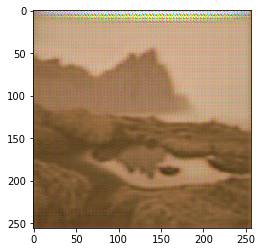

In [11]:
import matplotlib.pyplot as plt

img = plt.imread('./results/earth2mars_v1/test_latest/images/img-14_fake_B.png')
plt.imshow(img)